# 使用Haar级联分类器实现人脸检测

实现人脸检测的一个方法是Haar级联分类器. 这个方法并不新颖, 但是效率高, 效果也不错, 因此还是比较流行的.

在OpenCV中, 使用基于特征的分类级联, 可以学习隔离和检测图像中的人脸. 这种方法最早出现在2001年左右, 论文地址: [提出这种方法的论文](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf).

本笔记简单介绍和示范Haar级联分类器的原理.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Haar级联分类器由很多的Haar分类器组成. 这种分类器可以提取出图像中的**哈儿特征(Haar Features)**.

哈儿特征实际上是梯度的测量值, 在提取时, 会观察图像中某些特定区域(例如直线, 矩形等), 以某种方式减去这些区域, 从而计算像素差.

例如, 某个哈儿特征是直线, 那么我们就可以利用卷积核操作提取图像中的直线部分.

Haar级联分类器由很多分类器组成, 每次进行如下操作:

- 使用哈儿特征提取图像中的某个区域.
- 对这部分区域进行单独分类, 判断其中是否包含人脸:
  - 若包含, 则保留这份区域
  - 若不包含, 则删除这份区域
  
以上构成了一个Haar分类器, 通过级联这种分类器, 我们最终就能提取图像中人脸的部分了.

OpenCV中直接集成了对人脸的Haar分类器, 下面我们来使用它:

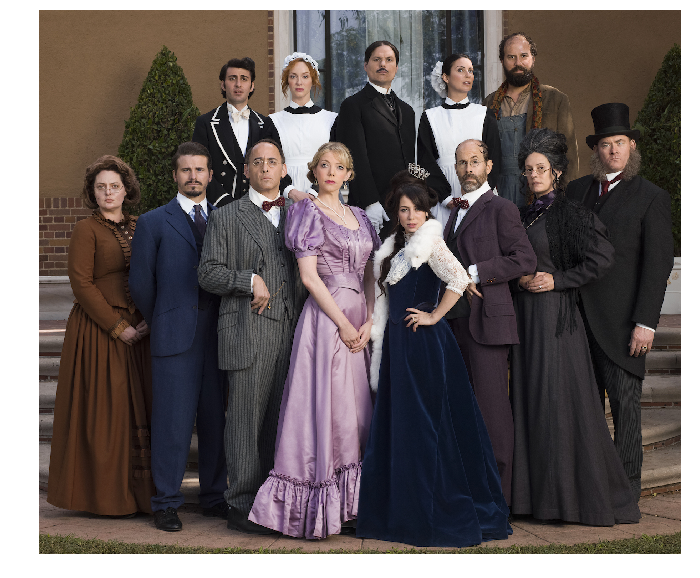

In [2]:
image = cv2.imread('images/multi_faces.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(image)

这张图像包含了多个人脸, 我们的目标是把它们全部提取出来.

首先, 把图像从彩色图像转换为灰度图像.

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

幸运的是, OpenCV已经帮我们集成好了人脸识别的模型. 通过`detector_architectures/haarcascade_frontalface_default.xml`可以找到已经训练好的架构.

我们要做的仅仅是加载这个架构.

通过函数`detectMultiScale`, 可以实现检测不同大小的人脸.

这个函数接收如下的参数:

- image: 要检测的图片.
- scaleFactor: 比例因子.
- minNeighbors: 在每个候选矩阵应该保留多少邻图像.

scaleFactor和minNeightbors需要根据具体的图像来调整.


In [5]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 4, 6)

在原始图像上标出检测框

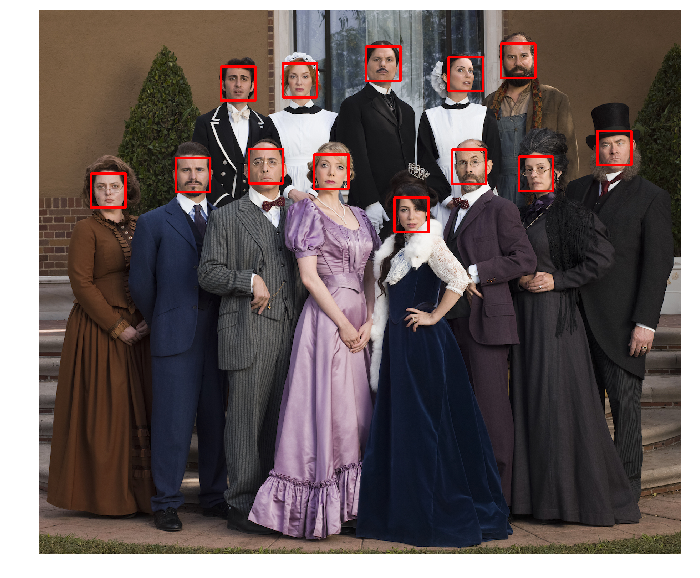

In [8]:
image_detect = np.copy(image)

for (x, y, w, h) in faces:
    cv2.rectangle(image_detect, (x, y), (x + w, y + h), (255, 0, 0), 5)
    
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(image_detect)